In [17]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

path = '/Users/yihan/Documents/UMD/AOSC/2022-Spring/AOSC611-Dynamics/HomeWork/'
file_1h = '1hour-pv.nc'
file_1m = '1mo-pv.nc'
file_5d = '5dy-pv.nc'

FillValue = -999000000.0

# 1h - data
pv_1h = nc.Dataset(path + file_1h,'r')
vars_key = pv_1h.variables.keys() 
lon_1h = pv_1h['lon'][:]
lat_1h = pv_1h['lat'][:]
q_1h = pv_1h['q'][:]
q_1h[q_1h == FillValue]= np.nan
pv_1h.close()


# 1m - data
pv_1m = nc.Dataset(path + file_1m,'r')
vars_key = pv_1m.variables.keys() 
lon_1m = pv_1m['lon'][:]
lat_1m = pv_1m['lat'][:]
q_1m = pv_1m['qm'][:]
q_1m[q_1m == FillValue]= np.nan
pv_1m.close()


# 1m - data
pv_5d = nc.Dataset(path + file_5d,'r')
vars_key = pv_5d.variables.keys() 
print(vars_key)
lon_5d = pv_5d['lon'][:]
lat_5d = pv_5d['lat'][:]
q_5d = pv_5d['qd'][:]
pv_5d.close()

dict_keys(['lon', 'lat', 'time', 'qd'])


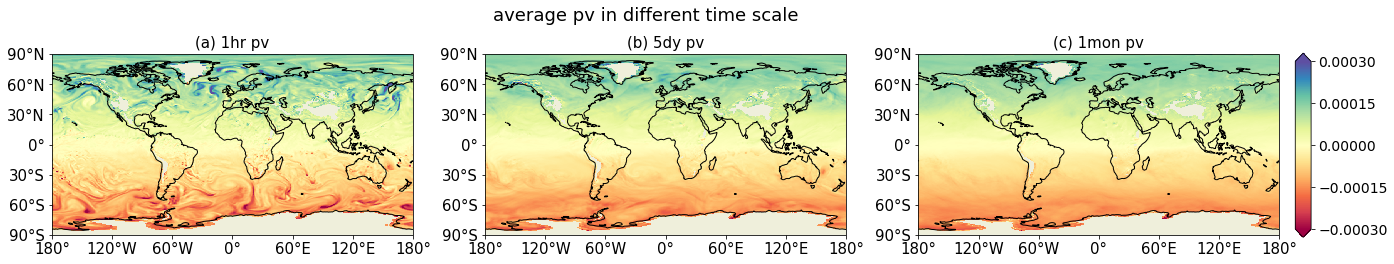

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs  
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size


# -- 画图

# 底图
fig = plt.figure(figsize=(22, 4))
fig.suptitle('average pv in different time scale',fontsize=18)
dlon, dlat = 60, 30
xticks = np.arange(-180, 180.1, dlon)
yticks = np.arange(-90,90.1, dlat)

# plot 1h pv
ax0 = fig.add_subplot(1,3,1, projection=ccrs.PlateCarree())
ax0.set_extent([-180, 180.1, -90, 90.1])
ax0.set_title('(a) 1hr pv',fontsize=15)
ax0.coastlines() 
ax0.add_feature(cfeature.LAND) #添加大陆特征
ax0.set_xticks(xticks, crs=ccrs.PlateCarree()) 
ax0.set_xticklabels(xticks,fontsize=15)
ax0.set_yticks(yticks, crs=ccrs.PlateCarree()) 
ax0.set_yticklabels(yticks,fontsize=15)
ax0.xaxis.set_major_formatter(LongitudeFormatter())
ax0.yaxis.set_major_formatter(LatitudeFormatter())

f0 = ax0.pcolor(lon_1h, lat_1h, q_1h[0,:,:],cmap = 'Spectral', vmin = -0.0003, vmax = 0.0003)


# plot 5d pv
ax1 = fig.add_subplot(1,3,2, projection=ccrs.PlateCarree())
ax1.set_extent([-180, 180.1, -90, 90.1])
ax1.set_title('(b) 5dy pv',fontsize=15)
ax1.coastlines() 
ax1.add_feature(cfeature.LAND) #添加大陆特征
ax1.set_xticks(xticks, crs=ccrs.PlateCarree()) 
ax1.set_xticklabels(xticks,fontsize=15)
ax1.set_yticks(yticks, crs=ccrs.PlateCarree()) 
ax1.set_yticklabels(yticks,fontsize=15)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())

f1 = ax1.pcolor(lon_5d, lat_5d, q_5d[0,:,:],cmap = 'Spectral', vmin = -0.0003, vmax = 0.0003)

# plot 1m pv
ax2 = fig.add_subplot(1,3,3, projection=ccrs.PlateCarree())
ax2.set_extent([-180, 180.1, -90, 90.1])
ax2.set_title('(c) 1mon pv',fontsize=15)
ax2.coastlines() 
ax2.add_feature(cfeature.LAND) #添加大陆特征
ax2.set_xticks(xticks, crs=ccrs.PlateCarree()) 
ax2.set_xticklabels(xticks,fontsize=15)
ax2.set_yticks(yticks, crs=ccrs.PlateCarree()) 
ax2.set_yticklabels(yticks,fontsize=15)
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())

f2 = ax2.pcolor(lon_1m, lat_1m, q_1m[0,:,:],cmap = 'Spectral', vmin = -0.0003, vmax = 0.0003)


cbar_ax = plt.axes([0.91, 0.18, 0.01, 0.64])
bar = plt.colorbar(f0, cax = cbar_ax, orientation='vertical', extend='both')

levs = np.arange(-0.0003, 0.0004 , 0.00015)    #色标范围与取值
bar.ax.tick_params(labelsize = 14)
bar.set_ticks(levs)


In [40]:
ang_v = 7.292 * 10**(-5)
# 1h
[Lon_1h, Lat_1h] = np.meshgrid(lon_1h, lat_1h)
phi_1h = Lat_1h/180 * np.pi

f_1h = 2 * ang_v * np.sin(np.array(phi_1h))
Ross_1h = abs(q_1h[0,:,:] - f_1h)/abs(f_1h)

# 5d
[Lon_5d, Lat_5d] = np.meshgrid(lon_5d, lat_5d)
phi_5d = Lat_5d/180 * np.pi

f_5d = 2 * ang_v * np.sin(np.array(phi_5d))
Ross_5d = abs(q_5d[0,:,:] - f_5d)/abs(f_5d)

# 1m
[Lon_1m, Lat_1m] = np.meshgrid(lon_1m, lat_1m)
phi_1m = Lat_1m/180 * np.pi

f_1m = 2 * ang_v * np.sin(np.array(phi_1m))
Ross_1m = abs(q_1m[0,:,:] - f_1m)/abs(f_1m)

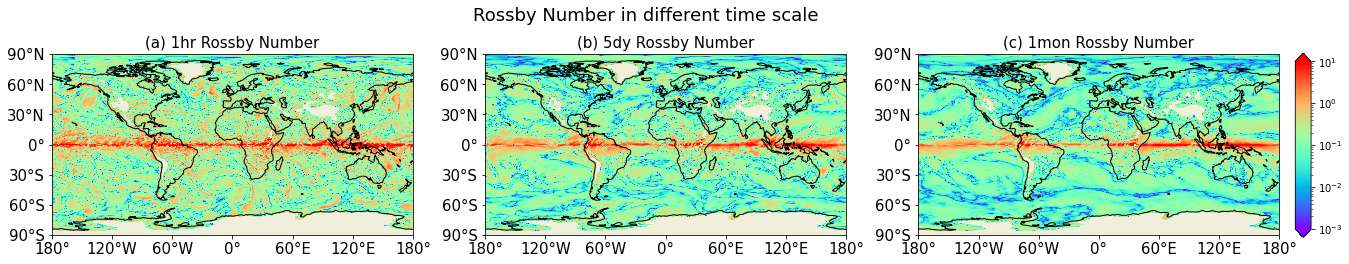

In [44]:
# -- 画图
import matplotlib.colors as colors
# 底图
fig = plt.figure(figsize=(22, 4))
fig.suptitle('Rossby Number in different time scale',fontsize=18)
dlon, dlat = 60, 30
xticks = np.arange(-180, 180.1, dlon)
yticks = np.arange(-90,90.1, dlat)

# plot 1h pv
ax0 = fig.add_subplot(1,3,1, projection=ccrs.PlateCarree())
ax0.set_extent([-180, 180.1, -90, 90.1])
ax0.set_title('(a) 1hr Rossby Number',fontsize=15)
ax0.coastlines() 
ax0.add_feature(cfeature.LAND) #添加大陆特征
ax0.set_xticks(xticks, crs=ccrs.PlateCarree()) 
ax0.set_xticklabels(xticks,fontsize=15)
ax0.set_yticks(yticks, crs=ccrs.PlateCarree()) 
ax0.set_yticklabels(yticks,fontsize=15)
ax0.xaxis.set_major_formatter(LongitudeFormatter())
ax0.yaxis.set_major_formatter(LatitudeFormatter())


f0 = ax0.pcolor(Lon_1h, Lat_1h, Ross_1h,
                   norm=colors.LogNorm(vmin=10**(-3), vmax=10**(1)),
                   cmap='rainbow', shading='auto')

# plot 5d pv
ax1 = fig.add_subplot(1,3,2, projection=ccrs.PlateCarree())
ax1.set_extent([-180, 180.1, -90, 90.1])
ax1.set_title('(b) 5dy Rossby Number',fontsize=15)
ax1.coastlines() 
ax1.add_feature(cfeature.LAND) #添加大陆特征
ax1.set_xticks(xticks, crs=ccrs.PlateCarree()) 
ax1.set_xticklabels(xticks,fontsize=15)
ax1.set_yticks(yticks, crs=ccrs.PlateCarree()) 
ax1.set_yticklabels(yticks,fontsize=15)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())

f1 = ax1.pcolor(Lon_5d, Lat_5d, Ross_5d,
                   norm=colors.LogNorm(vmin=10**(-3), vmax=10**(1)),
                   cmap='rainbow', shading='auto')


# plot 1m pv
ax2 = fig.add_subplot(1,3,3, projection=ccrs.PlateCarree())
ax2.set_extent([-180, 180.1, -90, 90.1])
ax2.set_title('(c) 1mon Rossby Number',fontsize=15)
ax2.coastlines() 
ax2.add_feature(cfeature.LAND) #添加大陆特征
ax2.set_xticks(xticks, crs=ccrs.PlateCarree()) 
ax2.set_xticklabels(xticks,fontsize=15)
ax2.set_yticks(yticks, crs=ccrs.PlateCarree()) 
ax2.set_yticklabels(yticks,fontsize=15)
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ax2.yaxis.set_major_formatter(LatitudeFormatter())

f2 = ax2.pcolor(Lon_1m, Lat_1m, Ross_1m,
                   norm=colors.LogNorm(vmin=10**(-3), vmax=10**(1)),
                   cmap='rainbow', shading='auto')



cbar_ax = plt.axes([0.91, 0.18, 0.01, 0.64])
bar = plt.colorbar(f0, cax = cbar_ax, orientation='vertical', extend='both')

plt.show()